## Scope
The location of a declaration determines the scope of where it is accessible via code.

We've dealt with two types of scope so far:

- module scope (Global)
- function scope (Local)

Anything declared inside of a function, including its parameter names, are considered local.

### Scope Rules

Assignment statements create or change local names by default.

Referencing a name follows LEGB:

    - Local: Scope of the function.
    - Enclosing: Scope of any enclosing functions.
    - Global: Scope of the file.
    - Built-in: Built-ins.

If none are found, an exception is raised.

#### `global` and `nonlocal`

Allow us to modify variables in non-local scopes.

Minimize use, as they make code harder to follow.

In [ ]:
RED = (255, 0, 0)

def paint(color):
    coordinate = (100, 100)
    ...

paint(RED)

# How many globals? 
# How many locals inside paint?

# where does print come from?
# list, set, dict, int, str, etc.

In [1]:
for name in dir(__builtins__):
    if name[0].islower():
        print(name)

abs
aiter
all
anext
any
ascii
bin
bool
breakpoint
bytearray
bytes
callable
chr
classmethod
compile
complex
copyright
credits
delattr
dict
dir
display
divmod
enumerate
eval
exec
execfile
filter
float
format
frozenset
get_ipython
getattr
globals
hasattr
hash
help
hex
id
input
int
isinstance
issubclass
iter
len
license
list
locals
map
max
memoryview
min
next
object
oct
open
ord
pow
print
property
range
repr
reversed
round
runfile
set
setattr
slice
sorted
staticmethod
str
sum
super
tuple
type
vars
zip


In [ ]:
## Without global declaration 
x = 2
def f():
    # x = 2
    x += 1
    print(x) # prints: 3
f() 
print(x) # global scope x was not modified

In [7]:
## With global declaration 
x = 5
def f():
    #global x
    #x = 1
    #x += 1
    y = x
    x = 5
    print(y) 
f() 
print(x) # global scope x was modified

UnboundLocalError: local variable 'x' referenced before assignment

### Nested Functions

We've seen an example before, we can define functions within functions.

In [10]:
def f1():
    x = "OUTER" 
    def f2():
        nonlocal x
        x = "INNER"
        print("inside f2 x=", x)
    print("inside f1 before f2 has been called x=", x)
    f2()
    print("inside f1 after f2 has been called", x)

In [11]:
inner_func = f1()

inside f1 before f2 has been called x= OUTER
inside f2 x= INNER
inside f1 after f2 has been called INNER


In [ ]:
inner_func()

In [12]:
def create_counter_func():
    counter = 0
    def f():
        nonlocal counter
        counter += 1
        print(f"called {counter} times")
    return f

g = create_counter_func()
h = create_counter_func()

In [18]:
h()

called 5 times


In [22]:
g()

called 5 times


#### Closures

When a function is nested inside another function, it remembers the enclosing scope for our LEGB lookup.

The combination of a nested function and its enclosing scope is called a closure.

In [24]:
def make_func(n):
    def f(x):
        # n: locally scoped to make_func() < enclosing scope
        # x: locally scoped to f()
        # we are using the n from the enclosing scope
        return x ** n 
    return f

In [25]:
to_the_third = make_func(3)
to_the_third(10)

1000

In [ ]:
squared = make_func(2)
squared(55)

In [ ]:
squared(10)

In [ ]:
import math

def make_cached_calc():
    prior_calls = {}
    
    def calc(x, y):
        if (x, y) not in prior_calls:
            print(f"doing computation on {x} and {y}...")
            # do computation
            answer = math.sin(x) + math.exp(y)
            # save to cache
            prior_calls[x, y] = answer

        print("cache=", prior_calls)
        # retrieve from cache
        return prior_calls[x, y]
    
    return calc

do_computation = make_cached_calc()

In [ ]:
do_computation(1, 2)

In [ ]:
do_computation(1, 2)

In [ ]:
do_computation(0.5, 0.7)

In [ ]:
do_computation2 = make_cached_calc()
do_computation2(1, 2)

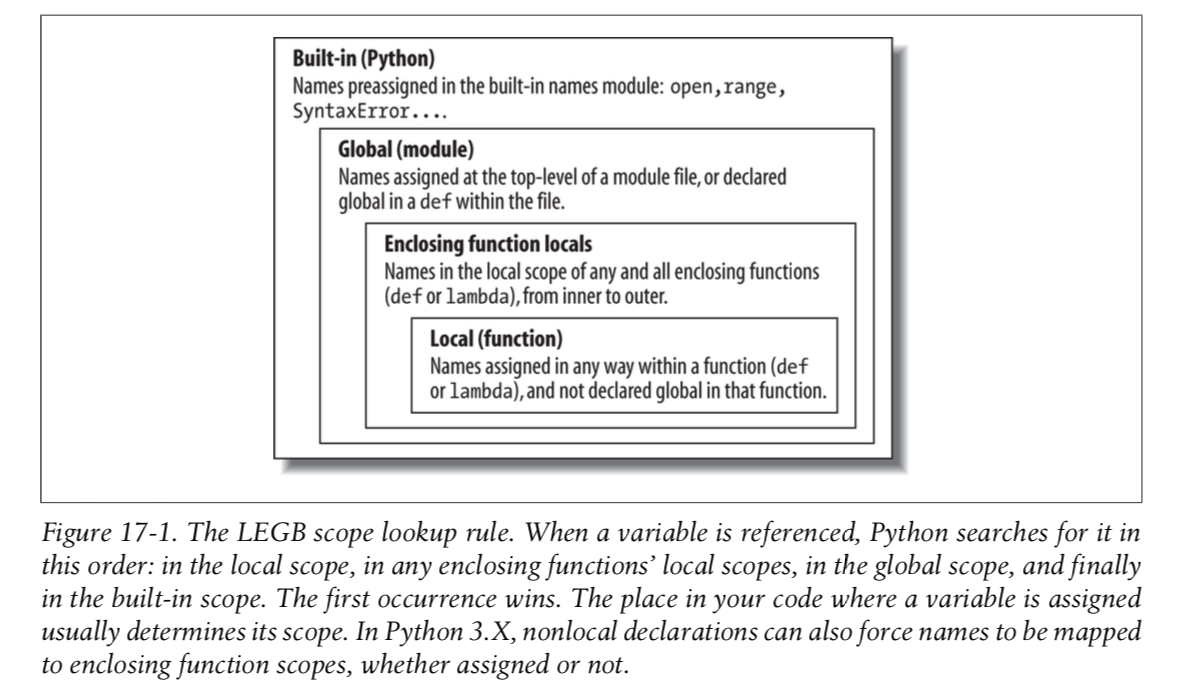

-- Learning Python, 2013